<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Ames Housing Data and Kaggle Challenge

--- 
# Part 2

Part 2 contains modelling, evaluation, conclusion and recommendations

---

### Contents:
- [Data Preparation](#Data-Preparation)
- [Modelling and Evaluation](#Modelling-and-Evaluation)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)
- [Saleprice prediction for Kaggle submission](#Saleprice-prediction-for-Kaggle-submission)

## Data Preparation

In [1]:
## Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
## Change display settings

# Change the display of dataframe - max number of columns and max number of rows
pd.set_option('display.max_columns',90)
pd.set_option('display.max_rows',60)

In [3]:
## Import dataset and format column names to lowercase as well as space replace by underscore

# Import cleaned training dataset and test dataset on Ames Housing 
# and clean column names

c_prop_trn = pd.read_csv('../data/cleaned_train.csv')
c_prop_trn.columns = c_prop_trn.columns.str.lower().str.replace(' ','_')

# Import testing dataset on Ames Housing and clean column names

prop_test = pd.read_csv('../data/test.csv')
prop_test.columns = prop_test.columns.str.lower().str.replace(' ','_')

In [4]:
## Group the features/predictors by 'numerical', 'ordinal' and 'nominal'

# numerical features

prop_trn_feat_num = [
    'lot_frontage',
    'lot_area',
    'overall_qual',
    'overall_cond',
    'mas_vnr_area',
    'bsmtfin_sf_1',
    'bsmtfin_sf_2',
    'bsmt_unf_sf',
    'total_bsmt_sf',
    '1st_flr_sf',
    '2nd_flr_sf',
    'low_qual_fin_sf',
    'gr_liv_area',
    'bsmt_full_bath',
    'bsmt_half_bath',
    'full_bath',
    'half_bath',
    'bedroom_abvgr',
    'kitchen_abvgr',
    'totrms_abvgrd',
    'fireplaces',
    'garage_cars',
    'garage_area',
    'wood_deck_sf',
    'open_porch_sf',
    'enclosed_porch',
    '3ssn_porch',
    'screen_porch',
    'pool_area',
    'misc_val',
    'yr_sold',
    'house_age_when_sold',
    'years_aft_reno']

# ordinal features

prop_trn_feat_ord = [
    'lot_shape',
    'utilities',
    'land_slope',
    'exter_qual',
    'exter_cond',
    'bsmt_qual',
    'bsmt_cond',
    'bsmt_exposure',
    'bsmtfin_type_1',
    'bsmtfin_type_2',
    'heating_qc',
    'electrical',
    'kitchen_qual',
    'functional',
    'fireplace_qu',
    'garage_finish',
    'garage_qual',
    'garage_cond',
    'paved_drive',
    'pool_qc',
    'fence']

# nominal features

prop_trn_feat_nom = [
    'ms_subclass',
    'ms_zoning',
    'street',
    'alley',
    'land_contour',
    'lot_config',
    'neighborhood',
    'condition_1',
    'condition_2',
    'bldg_type',
    'house_style',
    'roof_style',
    'roof_matl',
    'exterior_1st',
    'exterior_2nd',
    'mas_vnr_type',
    'foundation',
    'heating',
    'central_air',
    'garage_type',
    'misc_feature',
    'sale_type',
    'mo_sold',
    'year_built',
    'year_remod/add',
    'garage_yr_blt']


In [5]:
# Selected features for modelling

sel_feat = ['overall_qual','total_bsmt_sf','1st_flr_sf','gr_liv_area','garage_area','exter_qual','bsmt_qual',
                'kitchen_qual','neighborhood']

# Get dataframe with sel_features

prop_trn_sel_feat = c_prop_trn[sel_feat]

# list of features which require dummification

feat_req_dumm = []

for feat in sel_feat:
    if feat in (prop_trn_feat_ord + prop_trn_feat_nom):
        feat_req_dumm.append(feat)
    else:
        pass
    
print(feat_req_dumm)

['exter_qual', 'bsmt_qual', 'kitchen_qual', 'neighborhood']


In [6]:
# Use OneHotEncoder to dummify the categorical features
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
ohe.fit(prop_trn_sel_feat[feat_req_dumm])
transformed = ohe.transform(prop_trn_sel_feat[feat_req_dumm])
column_name = ohe.get_feature_names_out()
prop_trn_sel_feat = pd.concat([prop_trn_sel_feat, pd.DataFrame(transformed, columns=column_name)], axis=1)
prop_trn_sel_feat.drop(feat_req_dumm, axis=1, inplace=True)
prop_trn_sel_feat.head()

,overall_qual,total_bsmt_sf,1st_flr_sf,gr_liv_area,garage_area,exter_qual_Ex,exter_qual_Fa,exter_qual_Gd,exter_qual_TA,bsmt_qual_Ex,bsmt_qual_Fa,bsmt_qual_Gd,bsmt_qual_Po,bsmt_qual_TA,bsmt_qual_none,kitchen_qual_Ex,kitchen_qual_Fa,kitchen_qual_Gd,kitchen_qual_TA,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker
0,6,725,725,1479,475,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,7,913,913,2122,559,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,5,1057,1057,1057,246,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,384,744,1444,400,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,6,676,831,1445,484,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [7]:
# Check the shape of the features dataset and saleprice data

print(prop_trn_sel_feat.shape)
print(c_prop_trn.saleprice.shape)

(2049, 47)
(2049,)


In [8]:
# Split the datasets to train and test datasets

X_train, X_test, y_train, y_test = train_test_split(prop_trn_sel_feat, c_prop_trn.saleprice, 
                                                    train_size=0.80, random_state=10)

In [9]:
# Instantiate
ss = StandardScaler()

# fit and transform the train dataset with StandardScaler 
X_train_sc = ss.fit_transform(X_train)

# transform the test dataset with StandardScaler
X_test_sc = ss.transform(X_test)

## Modelling and Evaluation

##### Linear Regression

In [10]:
# Instantiate and fit model to train dataset
lr = LinearRegression()
lr.fit(X_train_sc, y_train)

# Obtain predicted values for train dataset
trn_lr_pred = lr.predict(X_train_sc)

# Metrics to evaluate the train dataset
trn_R_squared = r2_score(y_train, trn_lr_pred)
print(f'Train R-squared score for Linear Regression: {trn_R_squared}')

trn_lr_cross_val_score = cross_val_score(lr, X_train_sc, y_train, cv=5).mean()
print(f'Train cross val score for Linear Regression: {trn_lr_cross_val_score}')

trn_lr_rmse = np.sqrt(mean_squared_error(y_train, trn_lr_pred))
print(f'Train RSME for Linear Regression: {trn_lr_rmse}')

print('\n')

# Obtain predicted values for test dataset
test_lr_pred = lr.predict(X_test_sc)

# Metrics to evaluate the test dataset
test_R_squared = r2_score(y_test, test_lr_pred)
print(f'Test R-squared score for Linear Regression: {test_R_squared}')

test_lr_cross_val_score = cross_val_score(lr, X_test_sc, y_test, cv=5).mean()
print(f'Test cross val score for Linear Regression: {test_lr_cross_val_score}')

test_lr_rmse = np.sqrt(mean_squared_error(y_test, test_lr_pred))
print(f'Test RMSE for LinearRegression: {test_lr_rmse}')

print('\n')

# Metric to evaluate the unsplit dataset
lr_cross_val_score = cross_val_score(lr, prop_trn_sel_feat, c_prop_trn.saleprice, cv=5).mean()
print(f'cross val score for Linear Regression: {lr_cross_val_score}')

Train R-squared score for Linear Regression: 0.8881604825147413
Train cross val score for Linear Regression: -7.250628340050241e+24
Train RSME for Linear Regression: 26255.984770741354


Test R-squared score for Linear Regression: 0.8689873703948197
Test cross val score for Linear Regression: -3.482456476697889e+21
Test RMSE for LinearRegression: 29764.703769412412


cross val score for Linear Regression: 0.8791458180304395


##### Interpretation
- Obtained 89% for R2 score for train dataset. 89% of the variability in saleprice can be explained by the selected features.
- The R2 score for test dataset is close to R2 score for train dataset. Model is applicable for test dataset. 
- However, negative cross val scores were obtained for train and test. Since the R2 score are high positive value close to 1, it suggests that the the observations in the dataset were ordered with respect to the value of the target variable and cross_val_score does not shuffle the data provided to it. As a result, each fold contains a set of values that are similar to each other and don't represent the entire dataset.
- Linear Regression model may not be good model for sale price prediction.

##### Ridge Regression model

In [11]:
# Instantiate and fit model to train dataset

ridgeRegressor = Ridge()
ridgeRegressor.fit(X_train_sc, y_train)

# Obtain predicted values for train dataset
trn_ridge_pred = ridgeRegressor.predict(X_train_sc)

# Metrics to evaluate the train dataset
trn_R_squared = r2_score(y_train, trn_ridge_pred)
print(f'Train R-squared score for RidgeRegression: {trn_R_squared}')

trn_ridge_cross_val_score = cross_val_score(ridgeRegressor, X_train_sc, y_train, cv=5).mean()
print(f'Train cross val score for RidgeRegression: {trn_ridge_cross_val_score}')

trn_ridge_rmse = np.sqrt(mean_squared_error(y_train, trn_ridge_pred))
print(f'Train RSME for RidgeRegression: {trn_ridge_rmse}')

print('\n')

# Obtain predicted values for test dataset
test_ridge_pred = ridgeRegressor.predict(X_test_sc)

# Metrics to evaluate the test dataset
test_R_squared = r2_score(y_test, test_ridge_pred)
print(f'Test R-squared score for RidgeRegression: {test_R_squared}')

test_ridge_cross_val_score = cross_val_score(ridgeRegressor, X_test_sc, y_test, cv=5).mean()
print(f'Test cross val score for RidgeRegression: {test_ridge_cross_val_score}')

test_ridge_rmse = np.sqrt(mean_squared_error(y_test, test_ridge_pred))
print(f'Test RMSE for RidgeRegression: {test_ridge_rmse}')

print('\n')

# Metric to evaluate the unsplit dataset
ridge_cross_val_score = cross_val_score(ridgeRegressor, prop_trn_sel_feat, c_prop_trn.saleprice, cv=5).mean()
print(f'cross val score for RidgeRegression: {ridge_cross_val_score}')

Train R-squared score for RidgeRegression: 0.8881608451676535
Train cross val score for RidgeRegression: 0.8776843453282638
Train RSME for RidgeRegression: 26255.94220163309


Test R-squared score for RidgeRegression: 0.8690058986376853
Test cross val score for RidgeRegression: 0.8553827101203428
Test RMSE for RidgeRegression: 29762.598983173062


cross val score for RidgeRegression: 0.8790136225149923


##### Interpretation
- Obtained 89% for R2 score for train dataset. 89% of the variability in saleprice can be explained by the selected features.
- The R2 score for test dataset is close to R2 score for train dataset. Model is applicable for test dataset. 
- cross val score for train and test datasets are close to the R2 score. Model can generalise over the whole dataset. 

Side note: tried to use RidgeCV to get optimal alpha, but the R2 score obtained was worse

##### Lasso Regression model

In [12]:
# Instantiate and fit model to train dataset
lassoRegressor = Lasso()
lassoRegressor.fit(X_train_sc, y_train)

# Obtain predicted values for train dataset
trn_lasso_pred = lassoRegressor.predict(X_train_sc)

# Metrics to evaluate the train dataset
trn_R_squared = r2_score(y_train, trn_lasso_pred)
print(f'Train R-squared score for LassoRegression: {trn_R_squared}')

trn_lasso_cross_val_score = cross_val_score(lassoRegressor, X_train_sc, y_train, cv=5).mean()
print(f'Train cross val score for LassoRegression: {trn_lasso_cross_val_score}')

trn_lasso_rmse = np.sqrt(mean_squared_error(y_train, trn_lasso_pred))
print(f'Train RSME for LassoRegression: {trn_lasso_rmse}')

print('\n')

# Obtain predicted values for test dataset
test_lasso_pred = lassoRegressor.predict(X_test_sc)

# Metrics to evaluate the test dataset
test_R_squared = r2_score(y_test, test_lasso_pred)
print(f'Test R-squared score for LassoRegression: {test_R_squared}')

test_lasso_cross_val_score = cross_val_score(lassoRegressor, X_test_sc, y_test, cv=5).mean()
print(f'Test cross val score for LassoRegression: {test_lasso_cross_val_score}')

test_lasso_rmse = np.sqrt(mean_squared_error(y_test, test_lasso_pred))
print(f'Test RMSE for LassoRegression: {test_lasso_rmse}')

print('\n')

# Metric to evaluate the unsplit dataset
lasso_cross_val_score = cross_val_score(lassoRegressor, prop_trn_sel_feat, c_prop_trn.saleprice, cv=5).mean()
print(f'cross val score for LassoRegression: {lasso_cross_val_score}')

Train R-squared score for LassoRegression: 0.8881609736818412
Train cross val score for LassoRegression: 0.8776496747985506
Train RSME for LassoRegression: 26255.9271162989


Test R-squared score for LassoRegression: 0.8689769167916161
Test cross val score for LassoRegression: 0.8551864944197364
Test RMSE for LassoRegression: 29765.891220565656


cross val score for LassoRegression: 0.8791703561994634


##### Interpretation
- Obtained 89% for R2 score for train dataset. 89% of the variability in saleprice can be explained by the selected features.
- The R2 score for test dataset is close to R2 score for train dataset. Model is applicable for test dataset. 
- cross val score for train and test datasets are close to the R2 score. Model can generalise over the whole dataset. 

Side note: tried to use LassoCV to get optimal alpha, but the R2 score obtained was worse

##### Null Model

In [13]:
dummy_regr = DummyRegressor(strategy="mean")
X = c_prop_trn.drop('saleprice',axis=1)
y = c_prop_trn.saleprice
dummy_regr.fit(X, y)
dummy_r2_score = dummy_regr.score(X, y)
print(f'R^2 score for null model is {dummy_r2_score}')

dummy_cross_val_score = cross_val_score(dummy_regr, X, y, cv=5).mean()
print(f'cross val score for null model is {dummy_cross_val_score}')

dummy_pred = dummy_regr.predict(X)
dummy_rmse = np.sqrt(mean_squared_error(y, dummy_pred))
print(f'RMSE for null model is {dummy_rmse}')

R^2 score for null model is 0.0
cross val score for null model is -0.001986306883028455
RMSE for null model is 79276.56098763691


##### Interpretation
- Baseline model taking the mean value has very poor R2 score and it is not useful in the prediction of the saleprice. 

##### Comparing Linear , Ridge & Lasso Regression model with null model


|                       | Null Model | Linear Regression Model | Ridge Regression | Lasso Regression |
|-|-|-|-|-|
| Train R-squared score | -          | 0.88816                 | 0.88816          | 0.88816          |
| Train RMSE            | -          | 26256                   | 26256            | 26256            |
| Test R-squared score  | 0.0        | 0.86899                 | 0.86901          | 0.86898          |
| Test RMSE             | 79277      | 29765                   | 29763            | 29766            |


##### Interpretation
- For train dataset, all the regression  models gave same R2 score and RMSE.
- For the test dataset, Ridge Regression gave the highest R2 score, which is much higher than our baseline model whereby it uses the mean of the house’s sale price as prediction. 
- Ridge regression also gave the lowest RMSE. 
- With these, the best estimator is Ridge Regression model and this will lead to better prediction to the property’s sale price. 
- 89% of the variability in sale price can be explained by the selected features in our model. 


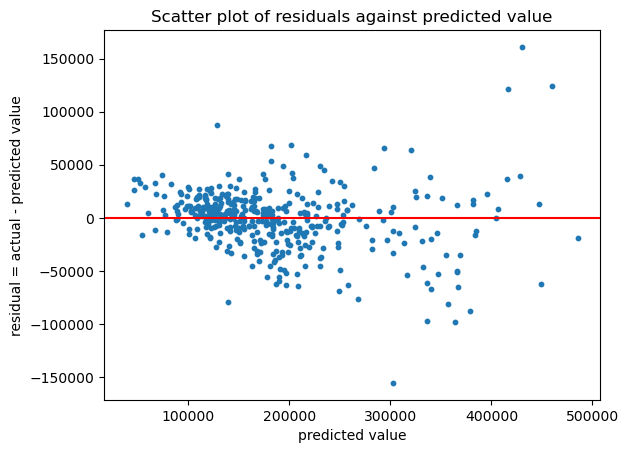

In [14]:
# Plot predictions (x-axis) against residuals (y-axis)
# Closer the scatter is to a horizontal line across zero, the better the model
residuals = y_test - test_ridge_pred
plt.scatter(test_ridge_pred, residuals, s=10)
plt.axhline(y=0, color = 'red')
plt.xlabel('predicted value')
plt.ylabel('residual = actual - predicted value')
plt.title('Scatter plot of residuals against predicted value')
plt.show()

##### Interpretation

- The residuals have relatively similar deviation from the zero. Relatively high accuracy.

In [15]:
# Save coefficient of selected features for ridge Regressor in series

coef_sel_features = pd.Series(ridgeRegressor.coef_, index=prop_trn_sel_feat.columns)


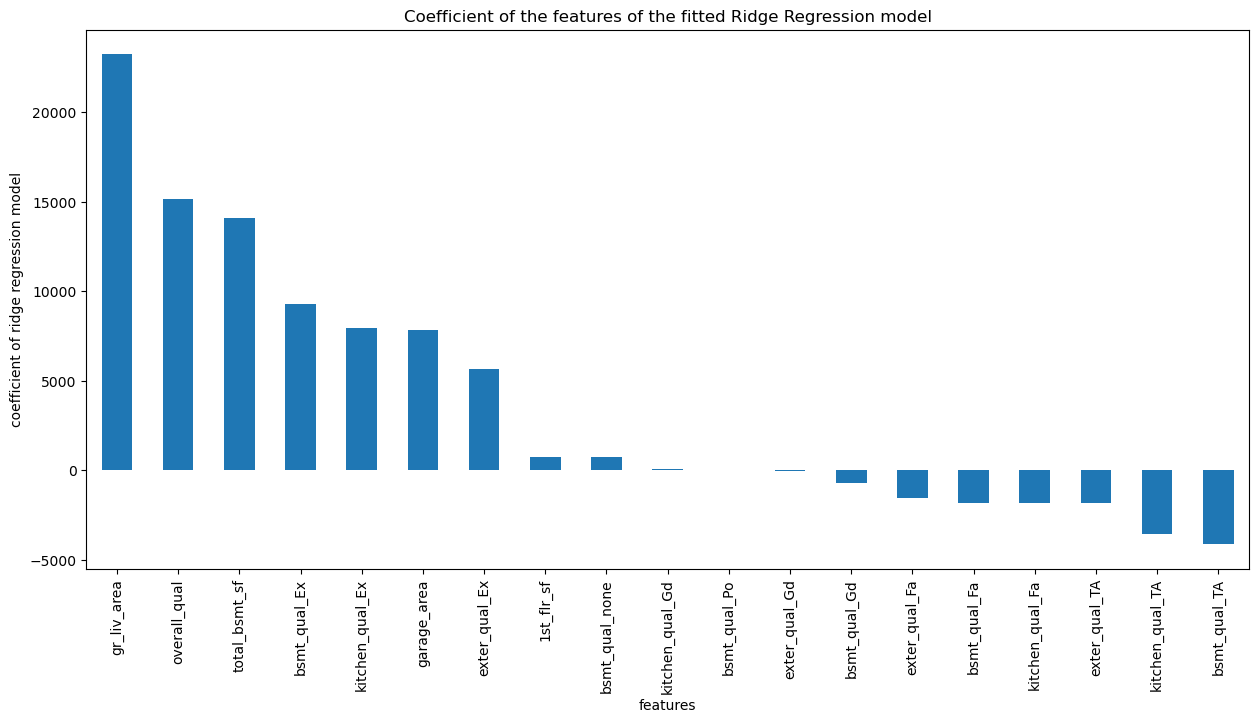

In [16]:
# Plot bar chart of the coefficient of the features (excluding neighborhood) in descending order

coef_sel_features[coef_sel_features.index.str.contains('neighborhood')==False].sort_values(ascending=False).plot.bar(figsize=(15, 7))

plt.title('Coefficient of the features of the fitted Ridge Regression model')
plt.xlabel('features')
plt.ylabel('coefficient of ridge regression model')

plt.show()

##### Interpretation
- the top 3 features that have greater impact to the sale price are ground living area, overall quality and basement area. 
- They have higher positive coefficient as compared to the rest. 
- Space and quality of the house are of importance to buyers. 
- features with near zero and less than zero have relatively insignificant impact to saleprice.


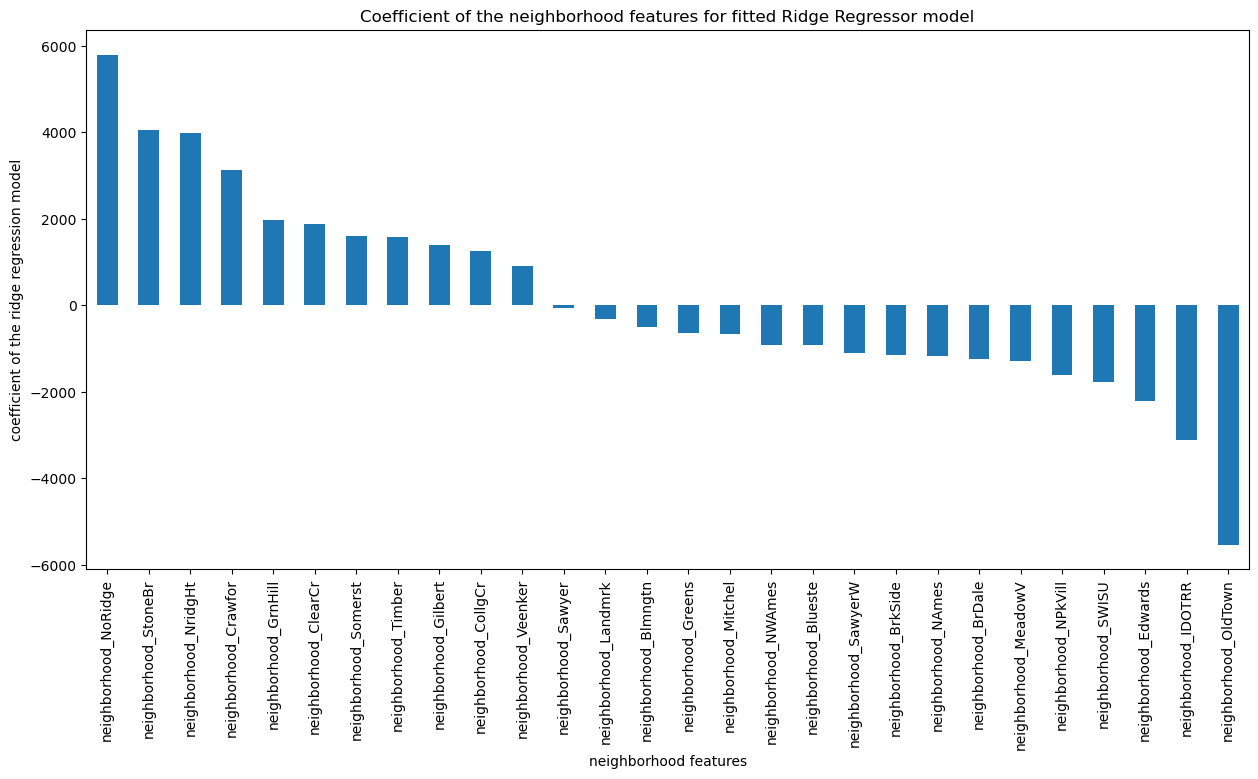

In [17]:
# Plot bar chart of the coefficient of the neighborhood features in descending order

coef_sel_features.loc[coef_sel_features.index.str.startswith('neighborhood')].sort_values(ascending=False).plot.bar(figsize=(15, 7))

plt.title(f'Coefficient of the neighborhood features for fitted Ridge Regressor model')
plt.xlabel(f'neighborhood features')
plt.ylabel(f'coefficient of the ridge regression model')

plt.show()

##### Interpretation
 - 3 top desired neighborhoods are Northridge, Stone Brook and Northridge Heights located at the north-west of Ames.
 - WIth higher positive coefficient, they are more likely to yield higher sale price. 
 - This is supported by our earlier analysis whereby these areas have higher median sale price than the rest. 
 - Further research was also conducted and found that they have lower crime rate and better education ranking. 
 - Areas to avoid are those with negative coefficient, especially Old Town, Iowa DOT and Rail Road and Edwards. 



## Conclusions and Recommendations

The limitations of our studies are:
- Insufficient data 
    - possible external factors that may skew the sale prices. External factors such as recession and natural disasters
    - data is from 2006 to 2010 which may not be relevant since it was more than 10 years ago.
- Time constraint
    - limited to linear models for our studies.
    
Moving forward:
- Monitoring new data
    - Change in trends
    - Change in consumer preference
    - Explore data sources to have more recent data
- Conduct Return of Investment studies
- Further optimisation of prediction model

Conclusion:
- Ridge Regression model has acheived 89% R2 score. Relatively high accuracy in prediction of sale price with the selected features.
- Top 3 core features that impacts saleprice are ground living area, overall quality and total basement area. 

With this, we would like to recommend the following:
- Invest on the land and properties in north-west of Ames such as Northridge, Stone Brook and Northridge Heights
- Prioritise budget allocation on these core features to increase sale price. e.g. Building houses with dimensions above the median for the core features

|                    |    Median    |
|-|-|
|Ground Living Area  | 1444 sq.ft.  |
|Overall Quality     | Score 6      |
|Total Basement Area | 994 sq. ft.  |

- Channel additional budget for marketing on these core features to attract buyers once the properties built are ready for sale.


## Saleprice prediction for Kaggle submission
    

In [18]:
# Filter the relevant selected features used for our model

prop_test_sel_feat = prop_test[sel_feat]

In [19]:
## Cleaning

# Find out if there is any null values

prop_test_sel_feat.isnull().sum()

overall_qual      0
total_bsmt_sf     0
1st_flr_sf        0
gr_liv_area       0
garage_area       0
exter_qual        0
bsmt_qual        25
kitchen_qual      0
neighborhood      0
dtype: int64

In [20]:
# Count number of rows with bsmt_qual is null and total bsmt sf is zero

prop_test_sel_feat[prop_test_sel_feat.bsmt_qual.isnull() & (prop_test_sel_feat.total_bsmt_sf == 0)].shape

# since the return value has 25 rows, it suggests that it is expected that the bsmt_qual is blank because there is no basement.
# Next step is to replace null value with 'none' since there is no basement.

(25, 9)

In [21]:
# Fill na in bsmt_qual with 'none' to be consistent with the train dataset

prop_test_sel_feat.bsmt_qual.fillna('none', inplace = True)

In [22]:
prop_test_sel_feat.dtypes

overall_qual      int64
total_bsmt_sf     int64
1st_flr_sf        int64
gr_liv_area       int64
garage_area       int64
exter_qual       object
bsmt_qual        object
kitchen_qual     object
neighborhood     object
dtype: object

In [23]:
# Use OneHotEncoder to dummify the categorical features
transformed_test = ohe.transform(prop_test_sel_feat[feat_req_dumm])
prop_test_sel_feat = pd.concat([prop_test_sel_feat, pd.DataFrame(transformed_test, columns=column_name)], axis=1)
prop_test_sel_feat.drop(feat_req_dumm, axis=1, inplace=True)
prop_test_sel_feat.head()

,overall_qual,total_bsmt_sf,1st_flr_sf,gr_liv_area,garage_area,exter_qual_Ex,exter_qual_Fa,exter_qual_Gd,exter_qual_TA,bsmt_qual_Ex,bsmt_qual_Fa,bsmt_qual_Gd,bsmt_qual_Po,bsmt_qual_TA,bsmt_qual_none,kitchen_qual_Ex,kitchen_qual_Fa,kitchen_qual_Gd,kitchen_qual_TA,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker
0,6,1020,908,1928,440,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,1967,1967,1967,580,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,7,654,664,1496,426,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,968,968,968,480,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6,1394,1394,1394,514,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# Check shape of df 

print(prop_test_sel_feat.shape)

(878, 47)


In [25]:
# Standardscaler

X_prop_test_sf_sc = ss.transform(prop_test_sel_feat)


In [26]:
# Use our trained Ridge model to get the predicted saleprice and add them to the dataframe prop_test_sel_feat

prop_test_sel_feat['SalePrice'] = ridgeRegressor.predict(X_prop_test_sf_sc)
prop_test_sel_feat.head()

,overall_qual,total_bsmt_sf,1st_flr_sf,gr_liv_area,garage_area,exter_qual_Ex,exter_qual_Fa,exter_qual_Gd,exter_qual_TA,bsmt_qual_Ex,bsmt_qual_Fa,bsmt_qual_Gd,bsmt_qual_Po,bsmt_qual_TA,bsmt_qual_none,kitchen_qual_Ex,kitchen_qual_Fa,kitchen_qual_Gd,kitchen_qual_TA,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,SalePrice
0,6,1020,908,1928,440,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155612.148333
1,5,1967,1967,1967,580,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,220355.069168
2,7,654,664,1496,426,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,184319.399154
3,5,968,968,968,480,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,109812.318767
4,6,1394,1394,1394,514,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,177853.259074


In [27]:
# add id to the dataframe prop_test_sel_feat

prop_test_sel_feat = pd.concat([prop_test_sel_feat, prop_test['id']], axis=1)
prop_test_sel_feat.head()

,overall_qual,total_bsmt_sf,1st_flr_sf,gr_liv_area,garage_area,exter_qual_Ex,exter_qual_Fa,exter_qual_Gd,exter_qual_TA,bsmt_qual_Ex,bsmt_qual_Fa,bsmt_qual_Gd,bsmt_qual_Po,bsmt_qual_TA,bsmt_qual_none,kitchen_qual_Ex,kitchen_qual_Fa,kitchen_qual_Gd,kitchen_qual_TA,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,SalePrice,id
0,6,1020,908,1928,440,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155612.148333,2658
1,5,1967,1967,1967,580,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,220355.069168,2718
2,7,654,664,1496,426,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,184319.399154,2414
3,5,968,968,968,480,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,109812.318767,1989
4,6,1394,1394,1394,514,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,177853.259074,625


In [28]:
# Save id and predicted SalePrice to csv for submission

prop_test_sel_feat[['id','SalePrice']].to_csv('../data/kaggle_submission.csv', index=False)

##### Kaggle Submission

Private score: RMSE = 24752

Public score : RMSE = 30070